# Logistic Regression Assignment
## Lead Scoring Case Study

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. When these people fill up a form providing their email address or phone number, or via referrels they are classified to be a lead

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


- To identify the variables that help identify the leads that are most likely to convert into paying customers.

- To assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

- To calculate the confusion matrix and know the overall accuracy,sensitivity,specificity and recall of the model i.e. how well these variables describe the lead conversion probability.
  

### Step 1: Importing dataframe

In [234]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [235]:
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [236]:
# Importing dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [239]:
df.shape

(9240, 37)

In [240]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Preparation

In [242]:
# Converting all the values into lower case

df = df.applymap(lambda x:x.lower() if type(x) == str else x)
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


#### (A) Removing the insignificant columns

In [244]:
# Remove the 'Prospect ID','Lead Number' columns as they are ID columns

df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [245]:
# Check the value_counts of all the columns

for i in df.columns:
    print(i," : ",df[i].count())
    print(df[i].value_counts())
    print('*'*60)

Lead Origin  :  9240
Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64
************************************************************
Lead Source  :  9204
Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64
************************************************************
Do Not Email  :  9240
Do Not Email
no     8506
yes     734
Name: count, dtype: i

In [246]:
# Check the columns having unique values

df.nunique().sort_values()

I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Receive More Updates About Our Courses              1
X Education Forums                                  2
Newspaper Article                                   2
Search                                              2
Digital Advertisement                               2
Through Recommendations                             2
Newspaper                                           2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
A free copy of Mastering The Interview              2
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
What matters most to you in choosing a course       3
Lead Quality                

In [247]:
# Removing the columns with unique values

df = df.loc[:, df.nunique() > 1]
df.nunique().sort_values()

Search                                              2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
Newspaper Article                                   2
A free copy of Mastering The Interview              2
Asymmetrique Profile Index                          3
Asymmetrique Activity Index                         3
What matters most to you in choosing a course       3
Lead Quality                                        5
Lead Origin                                         5
Lead Profile                                        6
What is your current occupation                     6
City                                                7
How did you hear about X Edu

#### (B) Handling NULL values and duplicates

In [249]:
# Replacing all "Select" with NaN (Since it means no option is selected)

df = df.replace("select",np.nan)
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified


In [250]:
# Inspect the NULL value columns

df_sorted = df.isnull().sum() * 100/len(df)
df_sorted.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [251]:
# We will take a Cutoff of 35% and drop the columns having >35% null values in them

df = df.drop(columns=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score',
                      'Asymmetrique Profile Index','Asymmetrique Activity Score','City','Specialization','Tags'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [252]:
# check null values again and get the columns having null values > 0 

df_null = df.isnull().sum() * 100/len(df)
df_null = df_null[df_null > 0]
df_null.sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [253]:
# Remove the rows of columns having <2% null values
drop_na = ['TotalVisits','Page Views Per Visit','Last Activity','Last Activity','Lead Source']
for i in drop_na:
    df = df.dropna(subset=[i])
    
# Check the null values of remaining columns again and get the columns having null values > 0 
df_null = df.isnull().sum() * 100/len(df)
df_null = df_null[df_null > 0]
df_null.sort_values(ascending=False)

What matters most to you in choosing a course    29.777386
What is your current occupation                  29.567996
Country                                          25.303064
dtype: float64

In [254]:
# Check the value_counts of all columns and handle the NULL values one by one
cols = ['What matters most to you in choosing a course','What is your current occupation','Country']
for i in cols:
    print(i," : ",df[i].count())
    print(df[i].value_counts())
    print("Total null values: ",df[i].isnull().sum())
    print('*'*60)

What matters most to you in choosing a course  :  6372
What matters most to you in choosing a course
better career prospects      6370
flexibility & convenience       1
other                           1
Name: count, dtype: int64
Total null values:  2702
************************************************************
What is your current occupation  :  6391
What is your current occupation
unemployed              5476
working professional     677
student                  206
other                     15
housewife                  9
businessman                8
Name: count, dtype: int64
Total null values:  2683
************************************************************
Country  :  6778
Country
india                   6491
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman       

In [255]:
# Handle the null values of above 3 columns by replacing them with "not provided"

for i in cols:
    df[i]= df[i].fillna("not provided") 
    print("Count of null values in ",i,": ",df[i].isnull().sum())
print("-"*80)
df.head(5)

Count of null values in  What matters most to you in choosing a course :  0
Count of null values in  What is your current occupation :  0
Count of null values in  Country :  0
--------------------------------------------------------------------------------


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [256]:
# Check info of ds again

print("Shape of the dataframe is: ",df.shape)
print("Info: ",df.info())

Shape of the dataframe is:  (9074, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country           

So now we have handled all the null values and are left with 20 columns

In [258]:
# Check for duplicate rows in the dataframe

duplicates = df[df.duplicated()]
print("Number of duplicate rows in the dataframe: ",len(duplicates))
duplicates.head(5)

Number of duplicate rows in the dataframe:  2036


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
7,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not provided,not provided,not provided,no,no,no,no,no,no,no,modified
16,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not provided,not provided,not provided,no,no,no,no,no,no,no,modified
47,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not provided,not provided,not provided,no,no,no,no,no,no,no,modified
49,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not provided,not provided,not provided,no,no,no,no,no,no,no,modified
67,api,olark chat,no,no,1,0.0,0,0.0,email opened,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [259]:
# Drop the duplicate rows from the dataframe

print("Shape of the dataframe before removing duplicates: ", df.shape)
df = df.drop_duplicates()
print("Shape of the dataframe after removing duplicates: ", df.shape)

Shape of the dataframe before removing duplicates:  (9074, 20)
Shape of the dataframe after removing duplicates:  (7038, 20)


#### (C) Handling Outliers

In [261]:
# Listing out the numerical and categorical columns

num_cols=df.describe().columns
print("Numerical columns: \n",num_cols)

print("-"*150)

cat_cols = list(set(df.columns) - set(df.describe().columns))
print("Categorical columns: \n",cat_cols)

Numerical columns: 
 Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
Categorical columns: 
 ['Do Not Email', 'Search', 'Through Recommendations', 'X Education Forums', 'Newspaper', 'Lead Source', 'What is your current occupation', 'Digital Advertisement', 'Newspaper Article', 'A free copy of Mastering The Interview', 'Last Activity', 'Country', 'What matters most to you in choosing a course', 'Do Not Call', 'Last Notable Activity', 'Lead Origin']


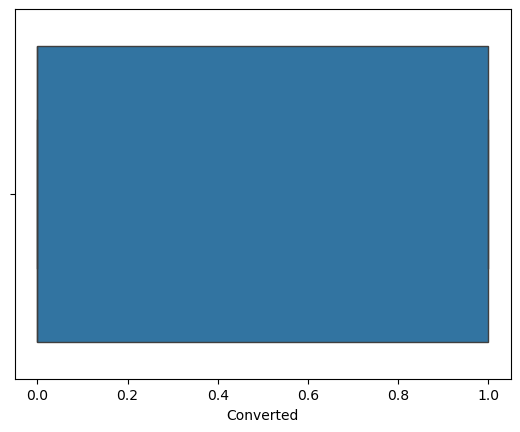

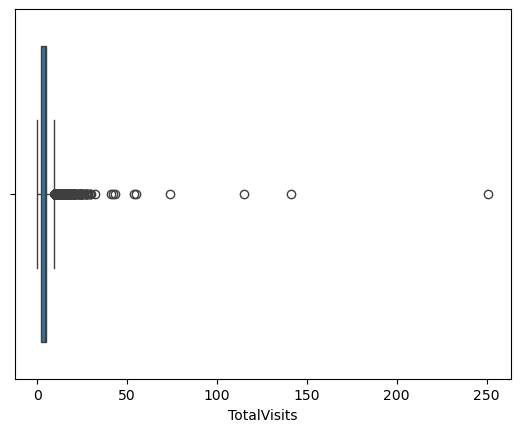

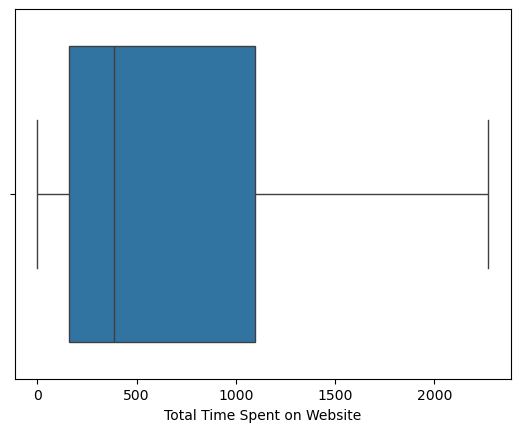

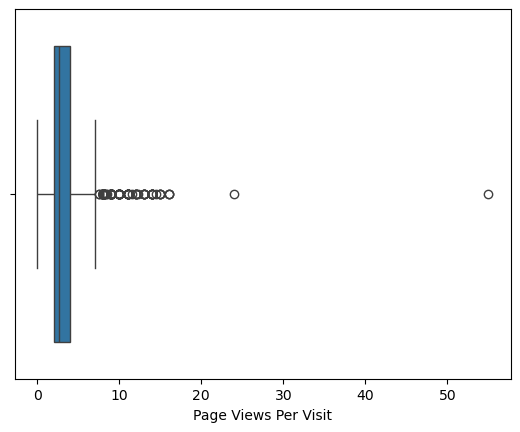

In [262]:
# Visualize the numerical columns and handle the outliers

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()


In [263]:
# Checking outliers of numerical columns at 25%, 50%, 75%, 90%, 95% and 99%
df[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7038.000000,7038.000000,7038.000000,7038.000000
mean,0.373544,4.444587,621.032253,3.045148
std,0.483779,5.103726,545.036704,1.990439
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,158.000000,2.000000
50%,0.000000,4.000000,386.000000,2.670000
75%,1.000000,5.000000,1097.000000,4.000000
90%,1.000000,8.000000,1450.300000,5.000000
95%,1.000000,11.000000,1606.000000,6.500000
99%,1.000000,18.000000,1858.630000,10.000000


Bounds of the column:  -2.5 9.5


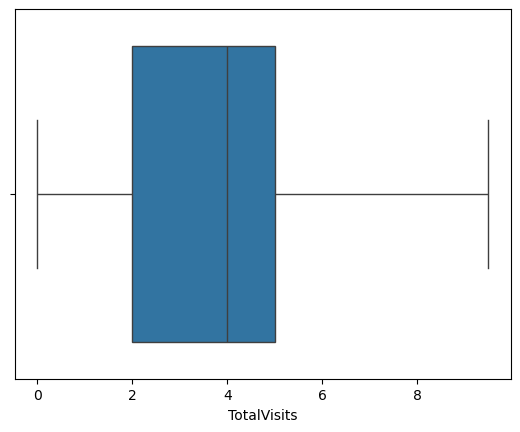

In [264]:
# Handle outliers in TotalVisits column (median)

q1=df["TotalVisits"].describe()["25%"]# 25th Percentile
q3=df["TotalVisits"].describe()["75%"]# 75th Percentile
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print("Bounds of the column: ",lower_bound,upper_bound)

df["TotalVisits"]=np.where(df["TotalVisits"]>upper_bound,upper_bound,df["TotalVisits"])
df["TotalVisits"]=np.where(df["TotalVisits"]<lower_bound,lower_bound,df["TotalVisits"])

sns.boxplot(x=df["TotalVisits"])
plt.show()

Bounds of the column:  -1.0 7.0


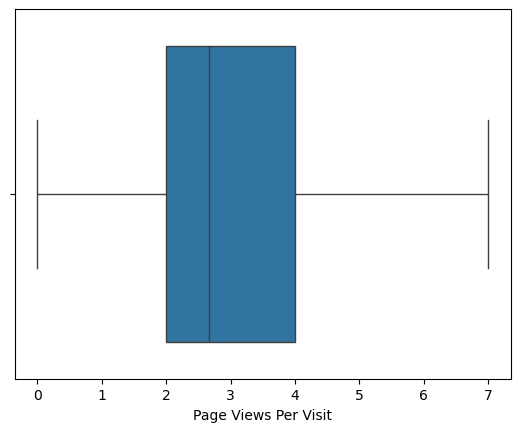

In [265]:
# Handle outliers in Page views per visit column (or median)

q1=df["Page Views Per Visit"].describe()["25%"]# 25th Percentile
q3=df["Page Views Per Visit"].describe()["75%"]# 75th Percentile
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print("Bounds of the column: ",lower_bound,upper_bound)

df["Page Views Per Visit"]=np.where(df["Page Views Per Visit"]>upper_bound,upper_bound,df["Page Views Per Visit"])
df["Page Views Per Visit"]=np.where(df["Page Views Per Visit"]<lower_bound,lower_bound,df["Page Views Per Visit"])

sns.boxplot(x=df["Page Views Per Visit"])
plt.show()

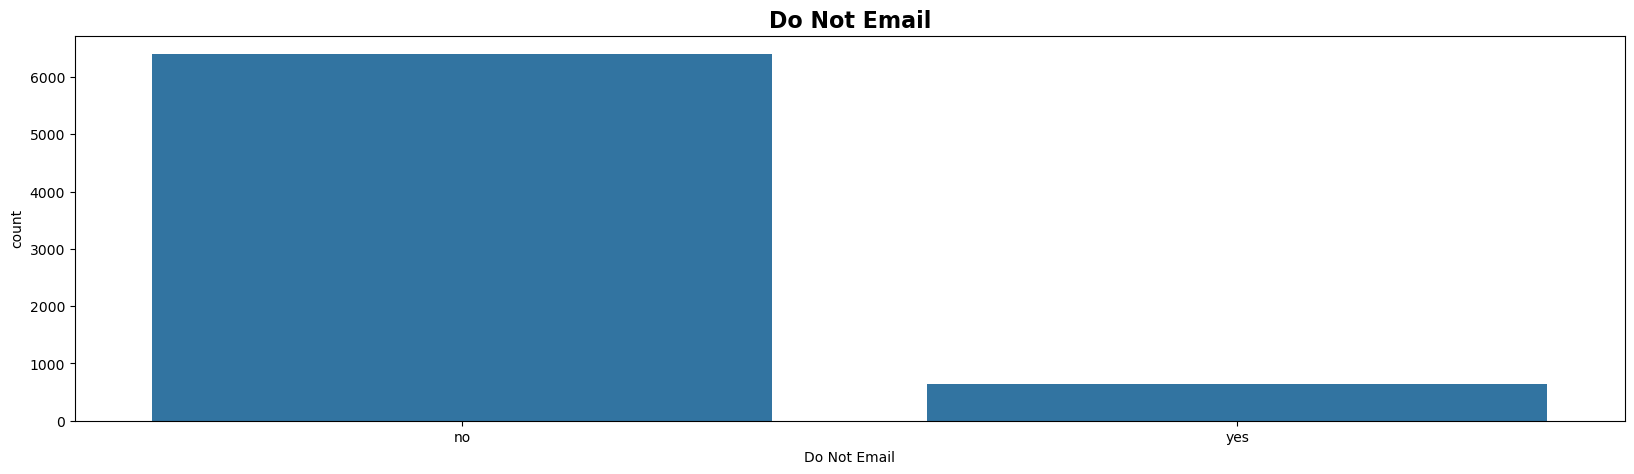

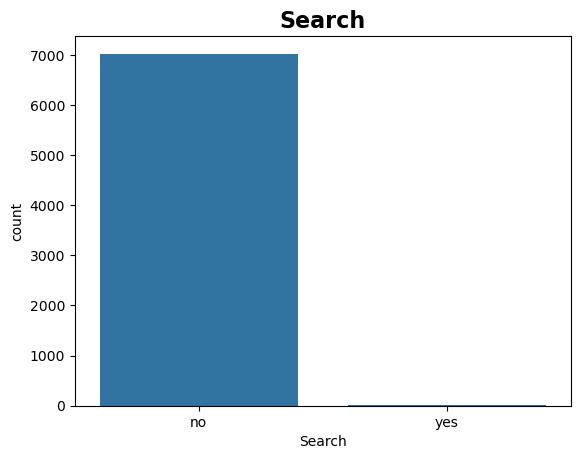

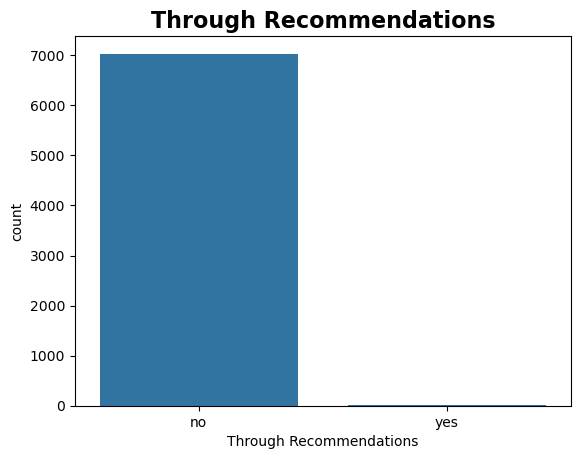

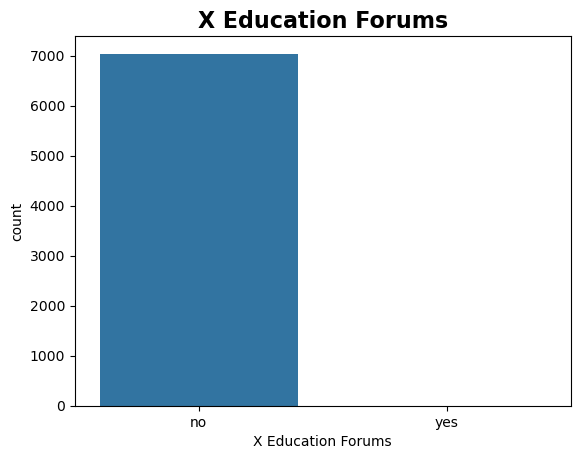

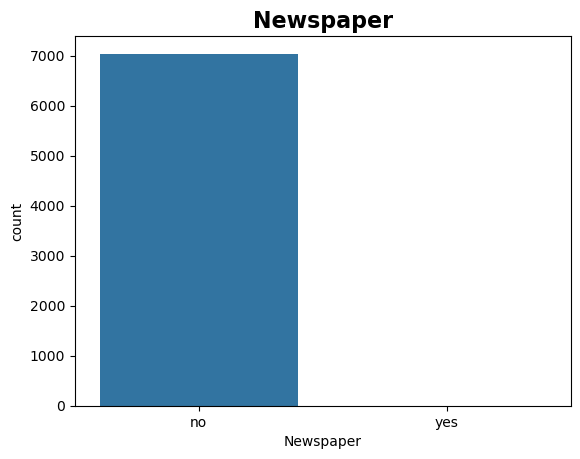

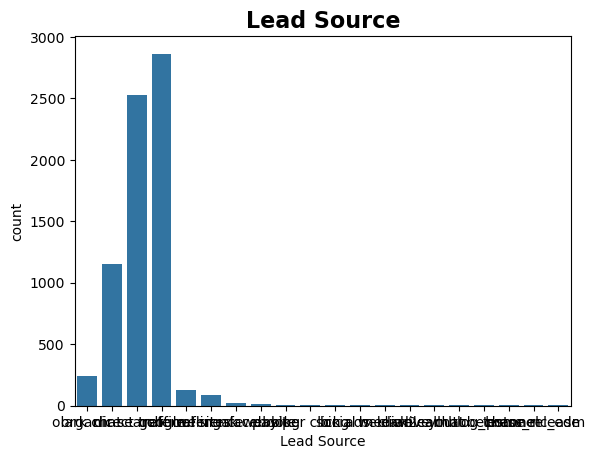

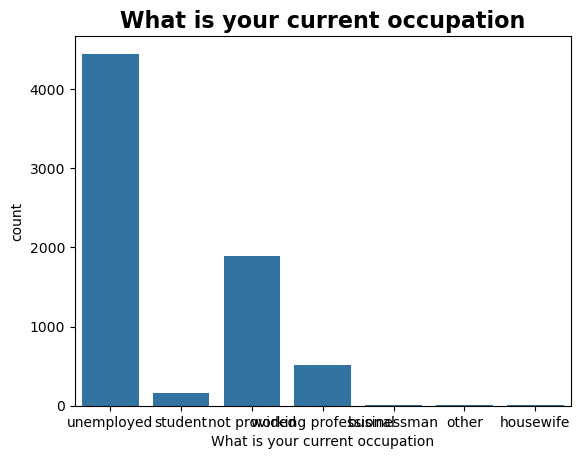

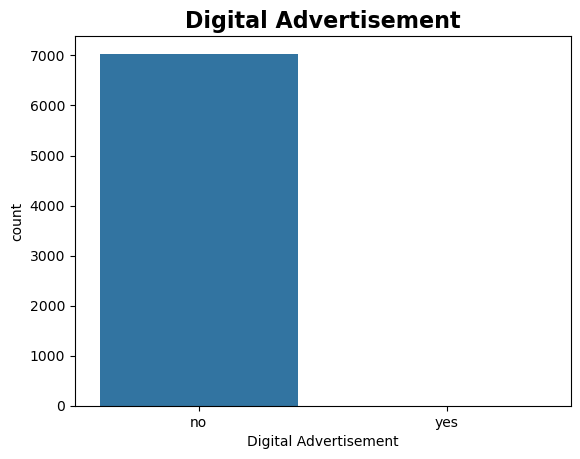

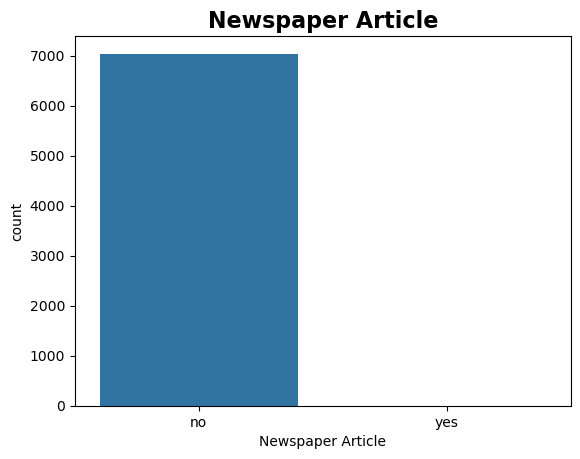

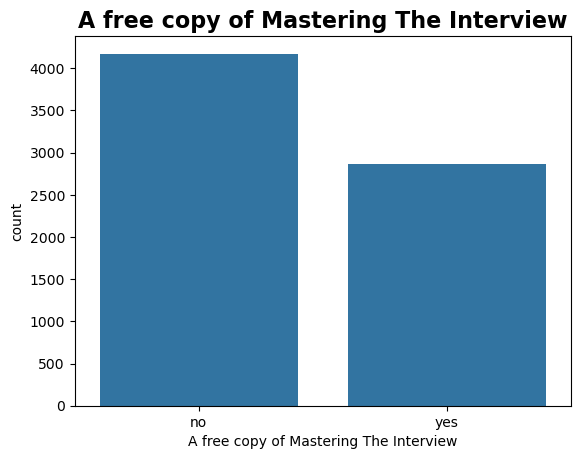

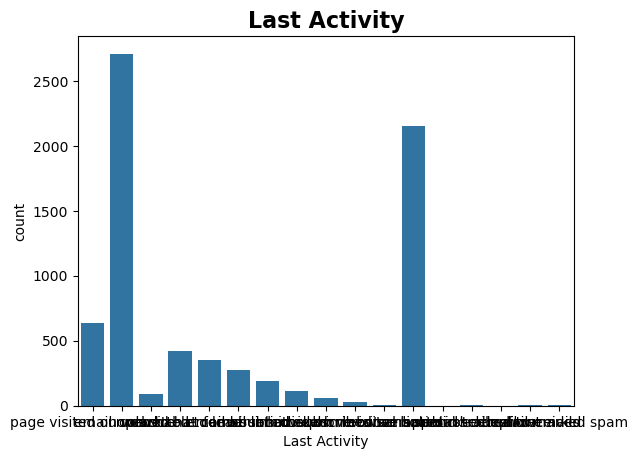

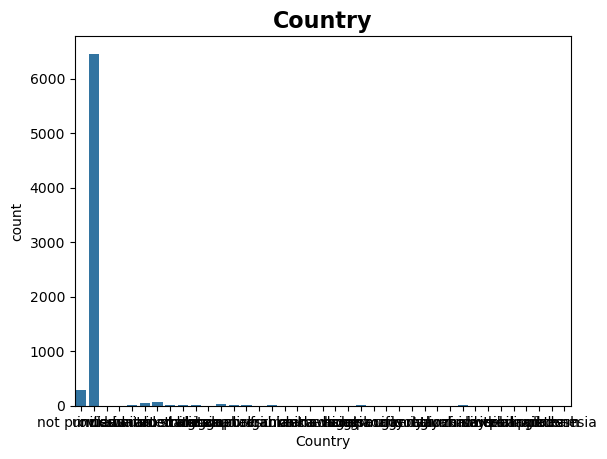

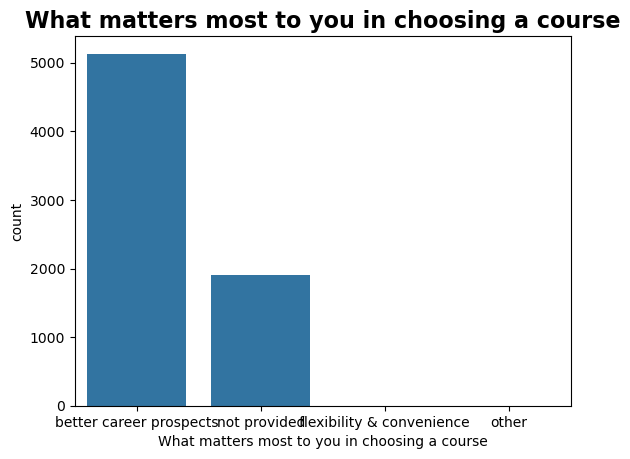

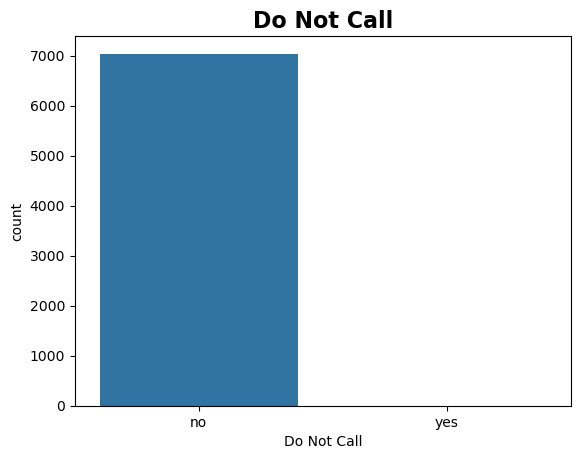

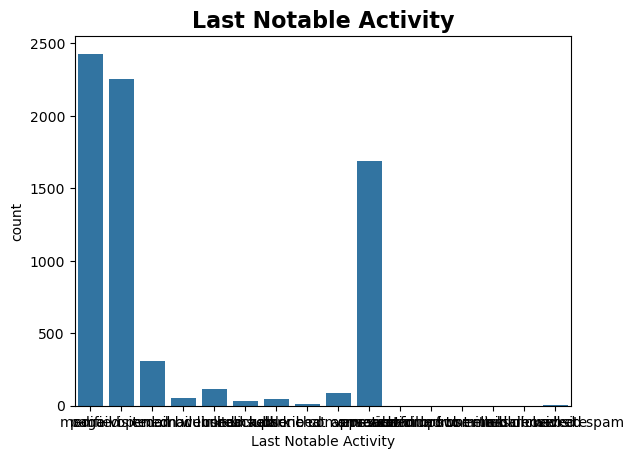

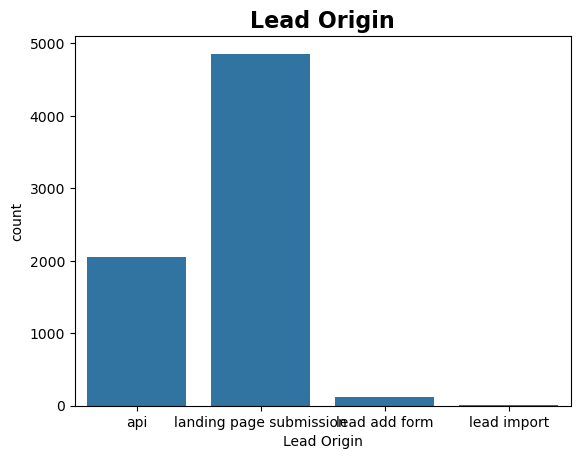

In [266]:
# Visualize the categorical columns

plt.figure(figsize=(20,5))
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.title(col, fontsize=16, fontweight="heavy")
    plt.show()

In [267]:
# Function to calculate percentage of each unique category

def calculate_percentage(df, col):
    return df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

# Apply the function to each categorical column
for col in df[cat_cols]:
    print(f"% of each category in '{col}':")
    print(calculate_percentage(df, col))
    print()

% of each category in 'Do Not Email':
Do Not Email
no     90.93%
yes     9.07%
Name: proportion, dtype: object

% of each category in 'Search':
Search
no     99.8%
yes     0.2%
Name: proportion, dtype: object

% of each category in 'Through Recommendations':
Through Recommendations
no     99.9%
yes     0.1%
Name: proportion, dtype: object

% of each category in 'X Education Forums':
X Education Forums
no     99.99%
yes     0.01%
Name: proportion, dtype: object

% of each category in 'Newspaper':
Newspaper
no     99.99%
yes     0.01%
Name: proportion, dtype: object

% of each category in 'Lead Source':
Lead Source
google               40.68%
direct traffic       35.86%
organic search       16.34%
olark chat            3.37%
referral sites        1.78%
reference             1.18%
welingak website      0.34%
facebook              0.14%
bing                  0.09%
click2call            0.06%
social media          0.03%
press_release         0.03%
pay per click ads     0.01%
blog           

In [268]:
df.shape

(7038, 20)

In [269]:
# Replace categories values having <1% data in each column with "Rare"

df_cols = ['What is your current occupation','Last Activity','Country','Last Notable Activity','Lead Source','Lead Origin','What matters most to you in choosing a course']
    
# Function to drop rows with categories making up less than 1% of the data
def drop_rare_categories(df, threshold):
    for col in df[df_cols]:
        # Calculate the percentage of each category
        value_counts = df[col].value_counts(normalize=True)
        # Identify categories with less than the threshold percentage
        rare_categories = value_counts[value_counts < threshold].index
        # Drop rows containing these rare categories
        df[col] = df[col].apply(lambda x: 'Rare' if x in rare_categories else x)
    return df

# Apply the function to the DataFrame
df = drop_rare_categories(df, threshold=0.01)
df.shape

(7038, 20)

In [270]:
# Re-verify the categories

for col in df[cat_cols]:
    print(f"% of each category in '{col}':")
    print(calculate_percentage(df, col))
    print()

% of each category in 'Do Not Email':
Do Not Email
no     90.93%
yes     9.07%
Name: proportion, dtype: object

% of each category in 'Search':
Search
no     99.8%
yes     0.2%
Name: proportion, dtype: object

% of each category in 'Through Recommendations':
Through Recommendations
no     99.9%
yes     0.1%
Name: proportion, dtype: object

% of each category in 'X Education Forums':
X Education Forums
no     99.99%
yes     0.01%
Name: proportion, dtype: object

% of each category in 'Newspaper':
Newspaper
no     99.99%
yes     0.01%
Name: proportion, dtype: object

% of each category in 'Lead Source':
Lead Source
google            40.68%
direct traffic    35.86%
organic search    16.34%
olark chat         3.37%
referral sites     1.78%
reference          1.18%
Rare                0.8%
Name: proportion, dtype: object

% of each category in 'What is your current occupation':
What is your current occupation
unemployed              63.17%
not provided             26.8%
working professional

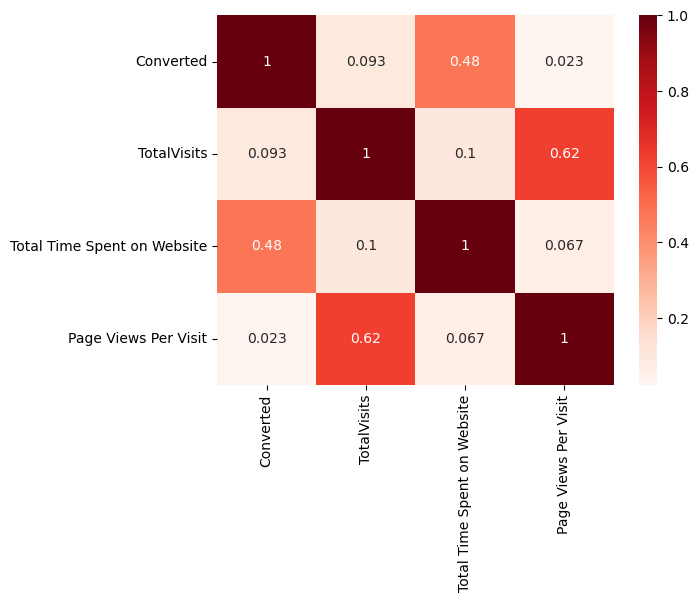

In [271]:
# Multivariant analysis on numerical columns

sns.heatmap(df[num_cols].corr(),annot=True,cmap="Reds")
plt.show()

#### (D) Converting the categorical binary variables (Yes/No) to 0/1

In [273]:
# Check the value_counts of categorical columns

for i in cat_cols:
    print(df[i].value_counts())
    print('*'*60)

Do Not Email
no     6400
yes     638
Name: count, dtype: int64
************************************************************
Search
no     7024
yes      14
Name: count, dtype: int64
************************************************************
Through Recommendations
no     7031
yes       7
Name: count, dtype: int64
************************************************************
X Education Forums
no     7037
yes       1
Name: count, dtype: int64
************************************************************
Newspaper
no     7037
yes       1
Name: count, dtype: int64
************************************************************
Lead Source
google            2863
direct traffic    2524
organic search    1150
olark chat         237
referral sites     125
reference           83
Rare                56
Name: count, dtype: int64
************************************************************
What is your current occupation
unemployed              4446
not provided            1886
working professional  

In [274]:
# Convert all Yes/No columns into binary format

varlist =  ['Newspaper Article','Do Not Email','Newspaper','Search','A free copy of Mastering The Interview','X Education Forums',
            'Through Recommendations','Digital Advertisement','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({"yes": 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,not provided,unemployed,better career prospects,0,0,0,0,0,0,0,modified
1,api,organic search,0,0,0,5.0,674,2.5,email opened,india,unemployed,better career prospects,0,0,0,0,0,0,0,email opened
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,student,better career prospects,0,0,0,0,0,0,1,email opened
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unreachable,india,unemployed,better career prospects,0,0,0,0,0,0,0,modified
4,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,india,unemployed,better career prospects,0,0,0,0,0,0,0,modified


#### (E) For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7038 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    7038 non-null   object 
 1   Lead Source                                    7038 non-null   object 
 2   Do Not Email                                   7038 non-null   int64  
 3   Do Not Call                                    7038 non-null   int64  
 4   Converted                                      7038 non-null   int64  
 5   TotalVisits                                    7038 non-null   float64
 6   Total Time Spent on Website                    7038 non-null   int64  
 7   Page Views Per Visit                           7038 non-null   float64
 8   Last Activity                                  7038 non-null   object 
 9   Country                                        7038 non-n

In [277]:
# Creating a dummy variable for the categorical variables and dropping the first one.

cat_cols = list(set(df.columns) - set(df.describe().columns))
dummy_vars = pd.get_dummies(df[cat_cols], drop_first=True).astype(int)
dummy_vars


,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Country_india,...,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,What is your current occupation_not provided,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9236,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
9237,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
9238,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [278]:
# Adding the results to the master dataframe

df = pd.concat([df, dummy_vars], axis=1)
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,What is your current occupation_not provided,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,not provided,...,0,0,1,0,0,0,0,0,1,0
1,api,organic search,0,0,0,5.0,674,2.5,email opened,india,...,0,0,0,1,0,0,0,0,1,0
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,...,1,0,0,0,0,0,0,1,0,0
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unreachable,india,...,1,0,0,0,0,0,0,0,1,0
4,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,india,...,0,1,0,0,0,0,0,0,1,0


In [279]:
# Dropping the main categorical columns

df = df.drop(columns=cat_cols)
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 7038 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           7038 non-null   int64  
 1   Do Not Call                                                            7038 non-null   int64  
 2   Converted                                                              7038 non-null   int64  
 3   TotalVisits                                                            7038 non-null   float64
 4   Total Time Spent on Website                                            7038 non-null   int64  
 5   Page Views Per Visit                                                   7038 non-null   float64
 6   Search                                                                 7038 non-null   int64 

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,What is your current occupation_not provided,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


Hence, we have converted all the columns into numerical columns

### Step 4: Test-Train Split

In [282]:
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,What is your current occupation_not provided,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [283]:
# Check the correlation matrix

X.corr()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,What is your current occupation_not provided,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
Do Not Email,1.000000,-0.005323,-0.066131,-0.102067,-0.038626,-0.014096,-0.005323,-0.003764,-0.003764,-0.007529,...,0.097199,-0.114375,0.020619,0.021083,-0.006986,-0.016229,0.067078,0.015275,-0.037996,-0.048809
Do Not Call,-0.005323,1.000000,0.002992,0.003711,-0.015244,-0.000753,-0.000284,-0.000201,-0.000201,-0.000402,...,-0.012607,0.003199,-0.003147,-0.007451,0.076246,-0.002267,-0.010201,-0.002563,0.012873,-0.004737
TotalVisits,-0.066131,0.002992,1.000000,0.103839,0.624557,0.069234,0.036104,0.026760,0.026760,0.022719,...,-0.101277,-0.002366,-0.131504,0.231440,-0.126733,0.065005,-0.012944,-0.044581,0.019925,0.008465
Total Time Spent on Website,-0.102067,0.003711,0.103839,1.000000,0.067229,0.003660,0.008924,0.004221,0.026050,0.002930,...,-0.018024,0.053878,-0.058138,0.006160,-0.027335,-0.019820,-0.124285,-0.014780,0.044182,0.133093
Page Views Per Visit,-0.038626,-0.015244,0.624557,0.067229,1.000000,0.030135,0.018670,-0.003400,0.002724,0.017182,...,-0.088380,0.013479,-0.217195,0.247584,-0.145231,0.051864,-0.021423,-0.051460,0.036943,-0.001237
Search,-0.014096,-0.000753,0.069234,0.003660,0.030135,1.000000,0.188445,0.267014,-0.000532,0.132737,...,0.019810,-0.036970,0.027022,0.014770,-0.004877,-0.006003,0.001788,-0.006787,0.001031,-0.000299
Newspaper Article,-0.005323,-0.000284,0.036104,0.008924,0.018670,0.188445,1.000000,0.707057,-0.000201,0.353302,...,0.004970,-0.013962,-0.003147,0.015349,-0.001842,-0.002267,0.008832,-0.002563,-0.004604,-0.004737
X Education Forums,-0.003764,-0.000201,0.026760,0.004221,-0.003400,0.267014,0.707057,1.000000,-0.000142,0.499893,...,0.015942,-0.009872,-0.002225,-0.005268,-0.001302,-0.001603,0.019703,-0.001812,-0.015613,-0.003350
Newspaper,-0.003764,-0.000201,0.026760,0.026050,0.002724,-0.000532,-0.000201,-0.000142,1.000000,-0.000284,...,0.015942,-0.009872,-0.002225,-0.005268,-0.001302,-0.001603,-0.007213,-0.001812,0.009102,-0.003350
Digital Advertisement,-0.007529,-0.000402,0.022719,0.002930,0.017182,0.132737,0.353302,0.499893,-0.000284,1.000000,...,0.031891,-0.019747,-0.004452,-0.010539,-0.002605,-0.003207,-0.000968,-0.003625,0.005848,-0.006701


In [284]:
# Putting response variable to y

y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [285]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [287]:
# Check X_train data

X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4926 entries, 1024 to 7357
Data columns (total 44 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           4926 non-null   int64  
 1   Do Not Call                                                            4926 non-null   int64  
 2   TotalVisits                                                            4926 non-null   float64
 3   Total Time Spent on Website                                            4926 non-null   int64  
 4   Page Views Per Visit                                                   4926 non-null   float64
 5   Search                                                                 4926 non-null   int64  
 6   Newspaper Article                                                      4926 non-null   int

In [288]:
# Fit_transform the numerical categories for standerdization

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,What is your current occupation_not provided,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
1024,0,0,-0.851625,-0.753837,-0.594689,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9212,1,0,0.379815,-1.004468,1.261947,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6461,0,0,-0.851625,1.525623,-0.594689,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1025,0,0,-0.030665,0.585300,-0.594689,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3535,0,0,-0.030665,0.720677,-0.594689,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [289]:
# Checking the Churn Rate

converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.354362034668945

We have almost 37% churn rate

### Step 6: Looking at Correlations

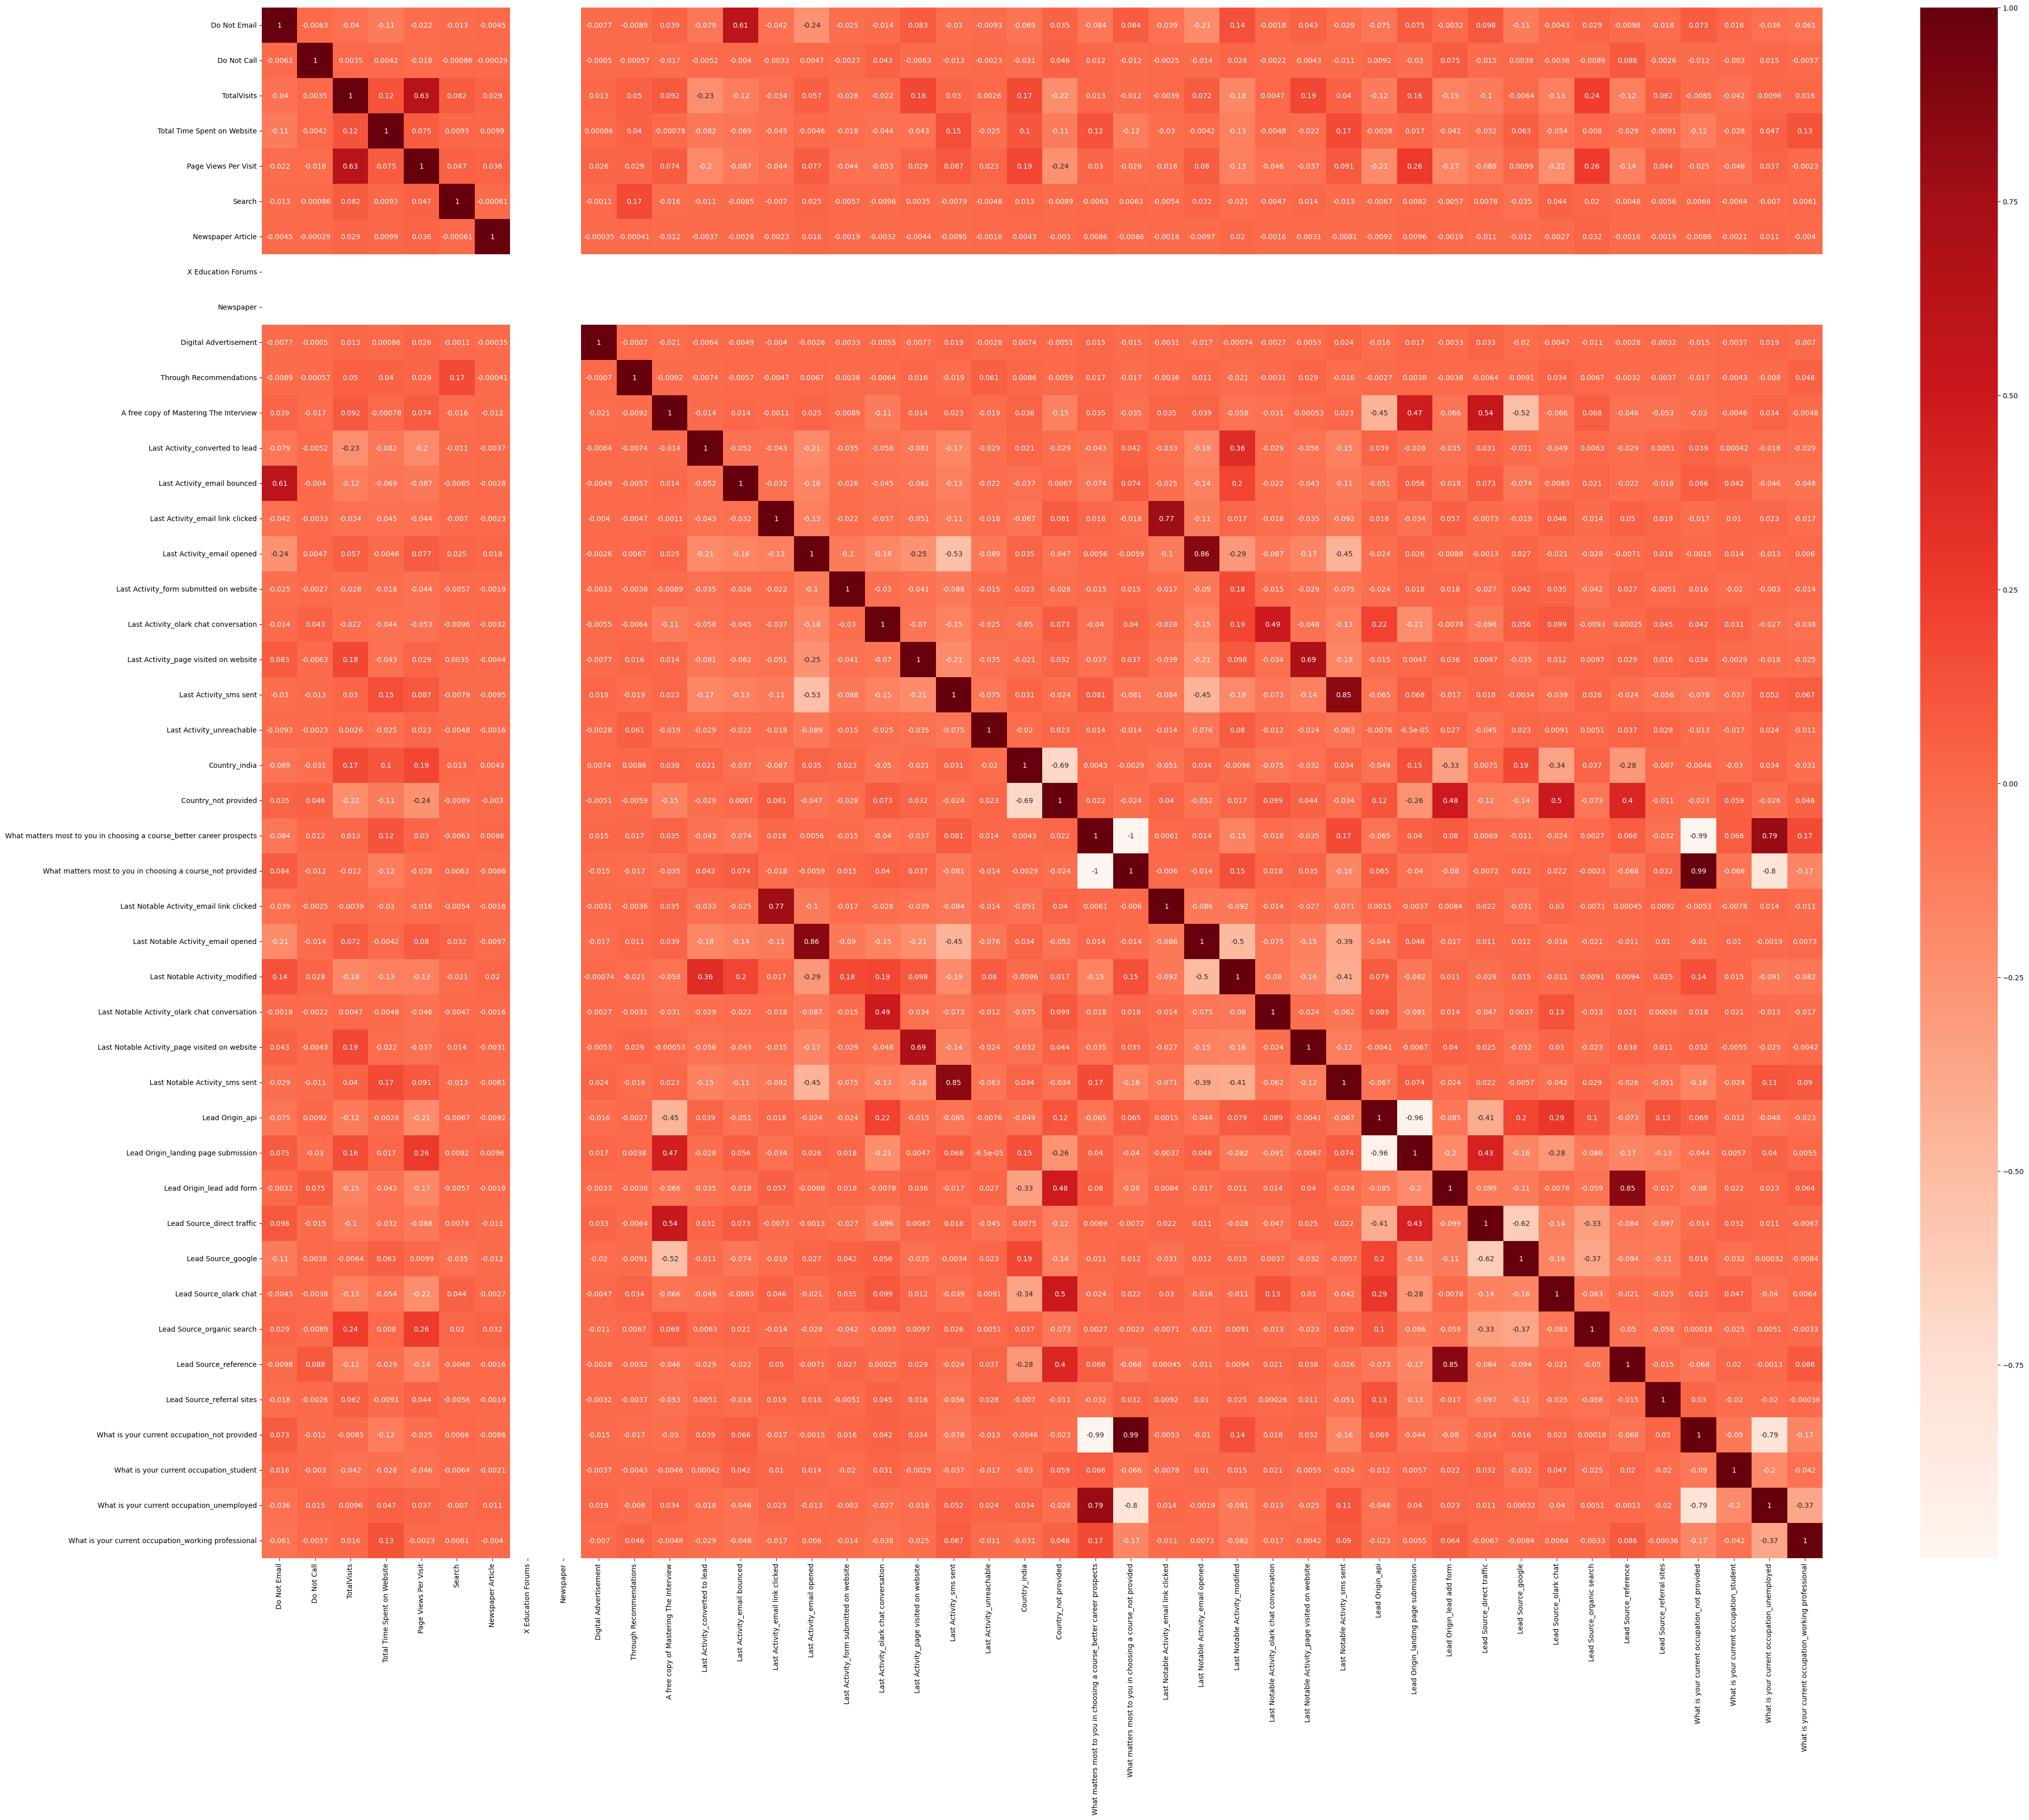

In [292]:
# Let's look at the heatmap

plt.figure(figsize = (50,40))
sns.heatmap(X_train.corr(),annot = True,cmap="Reds")
plt.show()


#### Dropping highly correlated dummy variables

In [294]:
X_test = X_test.drop(['What is your current occupation_not provided','Country_not provided','What matters most to you in choosing a course_not provided',
                     'Last Notable Activity_email opened','Last Notable Activity_email link clicked','Last Notable Activity_sms sent',
                      'Lead Source_reference','What is your current occupation_unemployed'],axis=1)
X_train = X_train.drop(['What is your current occupation_not provided','Country_not provided','What matters most to you in choosing a course_not provided',
                       'Last Notable Activity_email opened','Last Notable Activity_email link clicked','Last Notable Activity_sms sent',
                        'Lead Source_reference','What is your current occupation_unemployed'],axis=1)

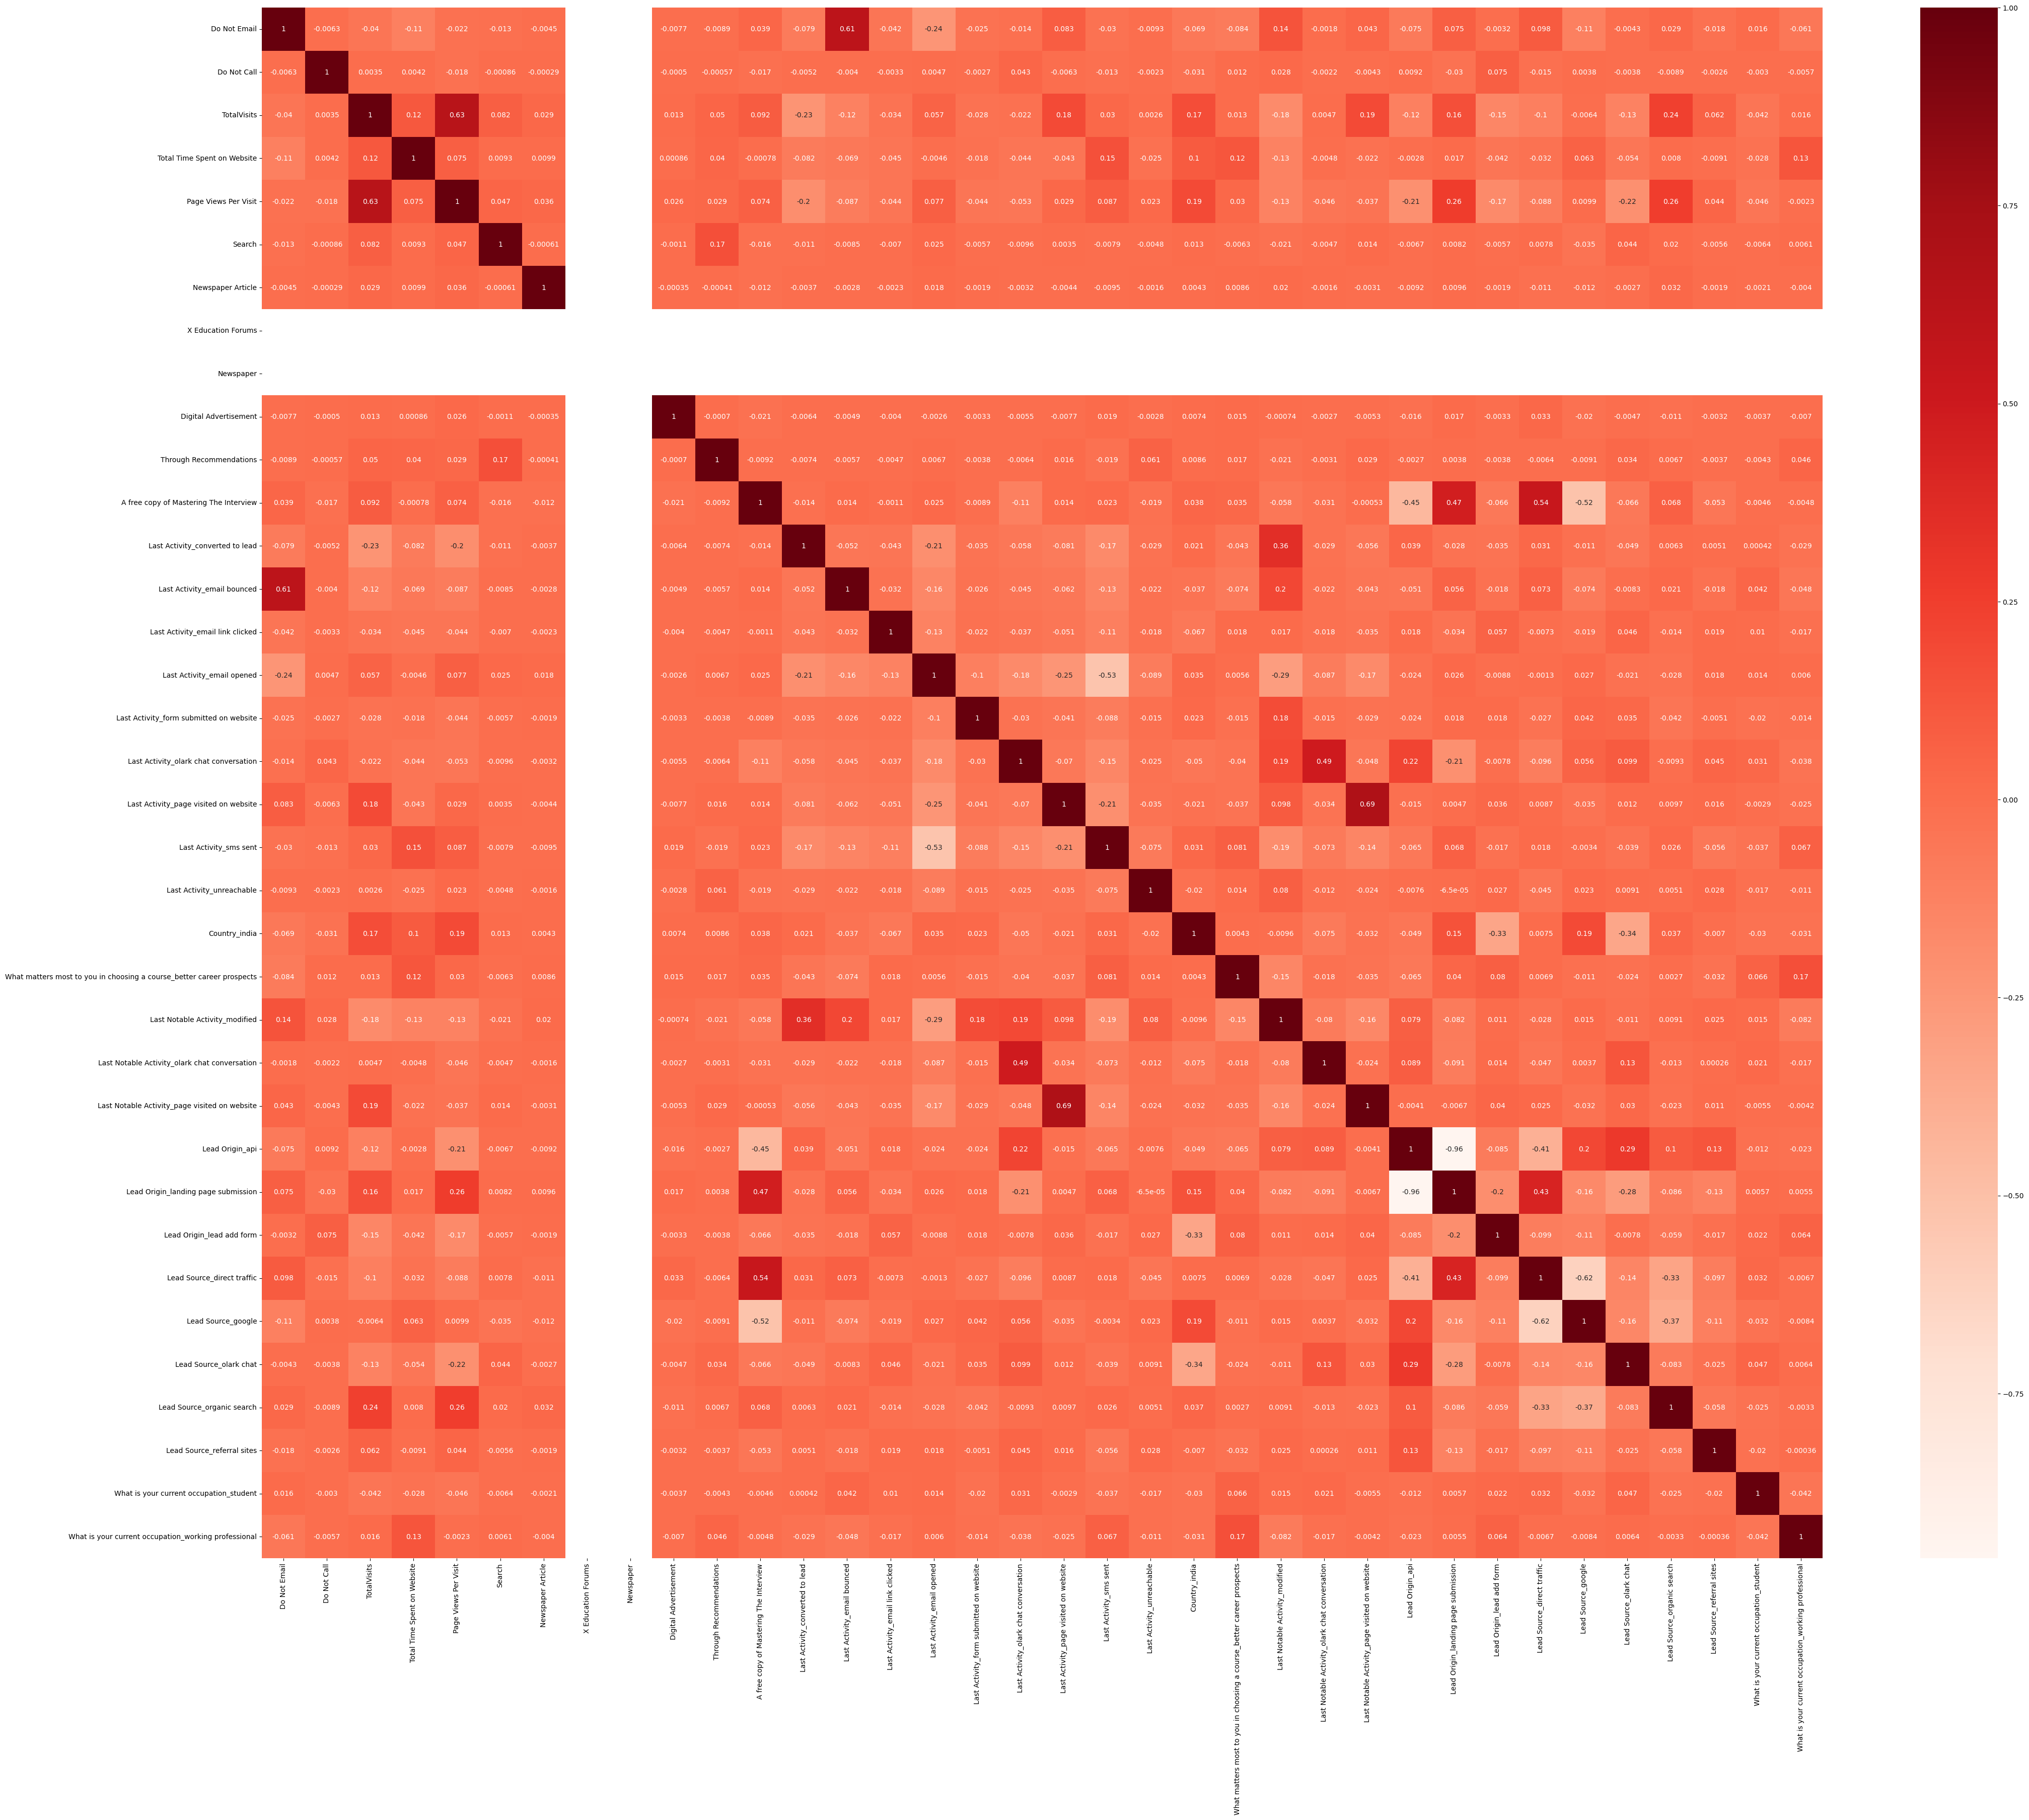

In [295]:
plt.figure(figsize = (50,40))
sns.heatmap(X_train.corr(),annot = True,cmap="Reds")
plt.show()

### Step 7: Feature Selection Using RFE

In [297]:
# Create object for logistic regeression and run RFE to obtain 15 significant variables

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [298]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Search', False, 14),
 ('Newspaper Article', False, 3),
 ('X Education Forums', False, 22),
 ('Newspaper', False, 21),
 ('Digital Advertisement', False, 17),
 ('Through Recommendations', False, 9),
 ('A free copy of Mastering The Interview', False, 20),
 ('Last Activity_converted to lead', True, 1),
 ('Last Activity_email bounced', True, 1),
 ('Last Activity_email link clicked', True, 1),
 ('Last Activity_email opened', True, 1),
 ('Last Activity_form submitted on website', True, 1),
 ('Last Activity_olark chat conversation', True, 1),
 ('Last Activity_page visited on website', True, 1),
 ('Last Activity_sms sent', False, 8),
 ('Last Activity_unreachable', False, 18),
 ('Country_india', False, 19),
 ('What matters most to you in choosing a course_better career prospects',
  True,
  1),
 ('Last Notable Activity_modified',

In [299]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_converted to lead', 'Last Activity_email bounced',
       'Last Activity_email link clicked', 'Last Activity_email opened',
       'Last Activity_form submitted on website',
       'Last Activity_olark chat conversation',
       'Last Activity_page visited on website',
       'What matters most to you in choosing a course_better career prospects',
       'Last Notable Activity_modified', 'Lead Origin_api',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'What is your current occupation_working professional'],
      dtype='object')

In [300]:
# Features that are deleted

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Activity_sms sent',
       'Last Activity_unreachable', 'Country_india',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_referral sites',
       'What is your current occupation_student'],
      dtype='object')

#### Assessing the model with StatsModels

In [302]:
# Using statsmodel get the statistics to further analyze the variables

X_train_sm1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4926
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.3
Date:                Tue, 17 Sep 2024   Deviance:                       4220.6
Time:                        19:27:52   Pearson chi2:                 4.94e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3729
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -0.0123      1.183     -0.010      0.992      -2.331       2.307
Do Not Email                                                             -1.6957      0.218     -7.784      0.000      -2.123      -1.269
Total Time Spent on Website                                               1.0819      0.041     26.706      0.000       1.003       1.161
Last Activity_converted to lead                                          -1.7858      0.224     -7.982      0.000      -2.224      -1.347
Last Activity_email bounced                                              -1.2075      0.407     -2.965      0.003      -2.006      -0.409
Last Activity_email link clicked                                         -1.1430      0.247     -4.625      0.000      -1.627      -0.659
Last Activity_email opened                                               -1.1379      0.088    -12.895      0.000      -1.311      -0.965
Last Activity_form submitted on website                                  -0.9385      0.328     -2.864      0.004      -1.581      -0.296
Last Activity_olark chat conversation                                    -1.5212      0.220     -6.927      0.000      -1.952      -1.091
Last Activity_page visited on website                                    -1.2327      0.156     -7.911      0.000      -1.538      -0.927
What matters most to you in choosing a course_better career prospects     1.1338      0.099     11.498      0.000       0.941       1.327
Last Notable Activity_modified                                           -0.6205      0.098     -6.355      0.000      -0.812      -0.429
Lead Origin_api                                                          -0.3988      1.180     -0.338      0.735      -2.711       1.913
Lead Origin_landing page submission                                      -0.7189      1.179     -0.610      0.542      -3.029       1.591
Lead Origin_lead add form                                                 2.5945      1.229      2.112      0.035       0.186       5.003
What is your current occupation_working professional                      2.6595      0.202     13.134      0.000       2.263       3.056
=========================================================================================================================================
"""

#### Checking VIFs

In [304]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Origin_landing page submission,5.21
9,What matters most to you in choosing a course_...,3.98
11,Lead Origin_api,2.82
5,Last Activity_email opened,2.27
10,Last Notable Activity_modified,2.23
0,Do Not Email,1.88
3,Last Activity_email bounced,1.78
2,Last Activity_converted to lead,1.46
8,Last Activity_page visited on website,1.32
7,Last Activity_olark chat conversation,1.28


In [305]:
# Let's first drop the variable `Lead Origin_landing page submission` since it has a high p-value and high VIF and rebuild the model

col = col.drop('Lead Origin_landing page submission', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_converted to lead', 'Last Activity_email bounced',
       'Last Activity_email link clicked', 'Last Activity_email opened',
       'Last Activity_form submitted on website',
       'Last Activity_olark chat conversation',
       'Last Activity_page visited on website',
       'What matters most to you in choosing a course_better career prospects',
       'Last Notable Activity_modified', 'Lead Origin_api',
       'Lead Origin_lead add form',
       'What is your current occupation_working professional'],
      dtype='object')

In [306]:
# Let's re-run the model using the selected variables

X_train_sm2 = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4926
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.5
Date:                Tue, 17 Sep 2024   Deviance:                       4220.9
Time:                        19:27:52   Pearson chi2:                 4.94e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3729
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -0.7310      0.107     -6.816      0.000      -0.941      -0.521
Do Not Email                                                             -1.6964      0.218     -7.788      0.000      -2.123      -1.269
Total Time Spent on Website                                               1.0810      0.040     26.710      0.000       1.002       1.160
Last Activity_converted to lead                                          -1.7885      0.224     -7.997      0.000      -2.227      -1.350
Last Activity_email bounced                                              -1.2087      0.407     -2.968      0.003      -2.007      -0.411
Last Activity_email link clicked                                         -1.1443      0.247     -4.631      0.000      -1.629      -0.660
Last Activity_email opened                                               -1.1380      0.088    -12.896      0.000      -1.311      -0.965
Last Activity_form submitted on website                                  -0.9413      0.328     -2.873      0.004      -1.583      -0.299
Last Activity_olark chat conversation                                    -1.5227      0.220     -6.935      0.000      -1.953      -1.092
Last Activity_page visited on website                                    -1.2340      0.156     -7.921      0.000      -1.539      -0.929
What matters most to you in choosing a course_better career prospects     1.1347      0.099     11.510      0.000       0.941       1.328
Last Notable Activity_modified                                           -0.6179      0.098     -6.335      0.000      -0.809      -0.427
Lead Origin_api                                                           0.3191      0.086      3.689      0.000       0.150       0.489
Lead Origin_lead add form                                                 3.3108      0.364      9.093      0.000       2.597       4.024
What is your current occupation_working professional                      2.6584      0.202     13.130      0.000       2.262       3.055
=========================================================================================================================================
"""

In [307]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What matters most to you in choosing a course_...,2.17
10,Last Notable Activity_modified,2.06
0,Do Not Email,1.80
3,Last Activity_email bounced,1.78
5,Last Activity_email opened,1.62
2,Last Activity_converted to lead,1.42
11,Lead Origin_api,1.42
7,Last Activity_olark chat conversation,1.26
8,Last Activity_page visited on website,1.23
13,What is your current occupation_working profes...,1.13


We can see that now all the p values are optimal and VIFs are also low. We can proceed with this set of features to further analyse.

In [309]:
# Reshaping it into an array

y_train_pred = res.predict(X_train_sm2).values.reshape(-1)
y_train_pred[:10]

array([0.17519407, 0.0848224 , 0.91466145, 0.45828585, 0.58995957,
       0.02010669, 0.64890475, 0.4272539 , 0.15221296, 0.10607286])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [311]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.175194,1024
1,0,0.084822,9212
2,1,0.914661,6461
3,1,0.458286,1025
4,1,0.589960,3535


##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [313]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.175194,1024,0
1,0,0.084822,9212,0
2,1,0.914661,6461,1
3,1,0.458286,1025,0
4,1,0.589960,3535,1


In [314]:
# Use metrics from sklearn for evaluation
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[2697  380]
 [ 600 1249]]


In [315]:
# Let's check the overall accuracy

acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
acc

0.8010556232237109

In [316]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [317]:
# Print accuracy
print("Accuracy   : ",acc)

# Calculate sensitivity
print("Sensitivity: ",TP / float(TP+FN))

# Calculate specificity
print("Specificity: ",TN / float(TN+FP))

# Precision
print("Precision  : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

# Recall
print("Recall     : ",confusion[1,1]/(confusion[1,0]+confusion[1,1]))


Accuracy   :  0.8010556232237109
Sensitivity:  0.6755002704164413
Specificity:  0.8765030874228145
Precision  :  0.7667280540208717
Recall     :  0.6755002704164413


### Step 8: Plotting the ROC Curve

#### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performance. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [320]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [321]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

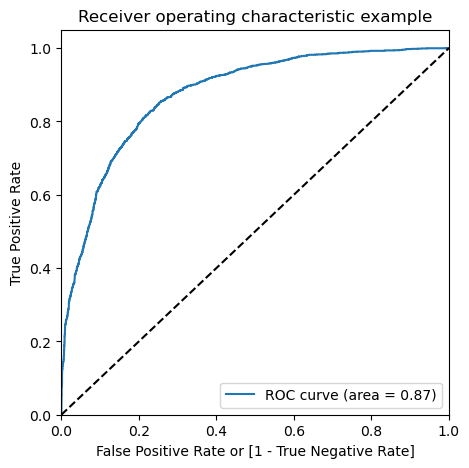

In [322]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### Step 9: Finding Optimal Cutoff Point

In [325]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.175194,1024,0,1,1,0,0,0,0,0,0,0,0
1,0,0.084822,9212,0,1,0,0,0,0,0,0,0,0,0
2,1,0.914661,6461,1,1,1,1,1,1,1,1,1,1,1
3,1,0.458286,1025,0,1,1,1,1,1,0,0,0,0,0
4,1,0.589960,3535,1,1,1,1,1,1,1,0,0,0,0


In [326]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375355  1.000000  0.000000
0.1   0.1  0.607389  0.977285  0.385115
0.2   0.2  0.739545  0.909140  0.637634
0.3   0.3  0.784003  0.855598  0.740981
0.4   0.4  0.799229  0.767983  0.818005
0.5   0.5  0.801056  0.675500  0.876503
0.6   0.6  0.789687  0.585722  0.912252
0.7   0.7  0.763906  0.472147  0.939227
0.8   0.8  0.736906  0.347756  0.970751
0.9   0.9  0.695696  0.202812  0.991875


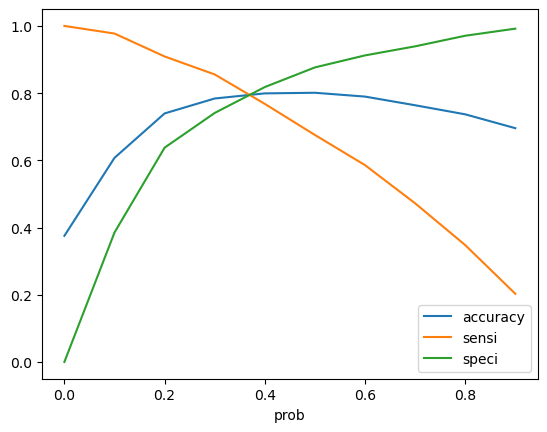

In [327]:
# Let's plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [328]:
# After trying few cutoffs between 0.35 and 0.40 as visible from the intersection of the graph above, we choose 0.35 as our cutoff.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.175194,1024,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.084822,9212,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.914661,6461,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.458286,1025,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.589960,3535,1,1,1,1,1,1,1,0,0,0,0,1


In [329]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7945594803085668

### Step 10: Making predictions on the test set

In [331]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [332]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,What matters most to you in choosing a course_better career prospects,Last Notable Activity_modified,Lead Origin_api,Lead Origin_lead add form,What is your current occupation_working professional
3023,1,-0.995321,0,0,0,0,0,0,0,0,1,0,0,0
1888,0,-0.585530,0,0,0,1,0,0,0,1,0,0,0,0
1554,1,-0.971538,0,1,0,0,0,0,0,1,1,1,0,0
7498,0,-1.081304,0,0,0,0,0,0,0,1,0,0,0,0
4927,0,2.136650,0,0,0,0,0,0,0,1,0,0,0,0


In [333]:
X_test_sm = sm.add_constant(X_test)

In [334]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3023    0.015965
1888    0.203054
1554    0.020826
7498    0.317507
4927    0.937808
7346    0.796625
1911    0.047950
5337    0.995123
784     0.949934
1953    0.512883
dtype: float64

In [335]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [336]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
3023,0
1888,0
1554,0
7498,1
4927,1
...,...
1549,1
3838,1
7385,1
4608,1


In [337]:
# Let's see the head

y_pred_1.head()

,0
3023,0.015965
1888,0.203054
1554,0.020826
7498,0.317507
4927,0.937808


In [338]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [339]:
# Putting Lead Number to index

y_test_df['Lead Number'] = y_test_df.index

In [340]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [341]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [342]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3023,0.015965
1,0,1888,0.203054
2,0,1554,0.020826
3,1,7498,0.317507
4,1,4927,0.937808


In [343]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [344]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [345]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,3023,0,0.015965
1,1888,0,0.203054
2,1554,0,0.020826
3,7498,1,0.317507
4,4927,1,0.937808


In [346]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [347]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,3023,0,0.015965,0
1,1888,0,0.203054,0
2,1554,0,0.020826,0
3,7498,1,0.317507,0
4,4927,1,0.937808,1


In [348]:
# Let's check the overall accuracy

accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)
accuracy

0.7945075757575758

In [349]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1053,  279],
       [ 155,  625]], dtype=int64)

In [350]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [351]:
# print the accuracy
print("Accuracy   : ",round(accuracy,5))

# Calculate sensitivity
print("Sensitivity: ",round((TP / float(TP+FN)),5))

# Calculate specificity
print("Specificity: ",round((TN / float(TN+FP)),5))

# Precision
print("Precision  : ",round((confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])),5))

# Recall
print("Recall     : ",round((confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])),5))


Accuracy   :  0.79451
Sensitivity:  0.80128
Specificity:  0.79054
Precision  :  0.69137
Recall     :  0.80128


- We can see that the Accuray, Sensitivity and Specificity are nearly equal. It means that the cutoff 0.35 is optimal.
- The recall is a good 80.1% for the model, which means the model is able to correctly predict 80% of the lead conversions.

In [353]:
# Also calculate the lead scores of each lead (Converted_Prob * 100)

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round((x*100),2))
y_pred_final

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,3023,0,0.015965,0,1.60
1,1888,0,0.203054,0,20.31
2,1554,0,0.020826,0,2.08
3,7498,1,0.317507,0,31.75
4,4927,1,0.937808,1,93.78
...,...,...,...,...,...
2107,1549,1,0.311079,0,31.11
2108,3838,1,0.292652,0,29.27
2109,7385,1,0.376614,1,37.66
2110,4608,1,0.186020,0,18.60
